In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.pad(x_train, ((0,0),(10,10),(10,10)), 'constant')
x_test = np.pad(x_test,((0,0),(10,10),(10,10)),'constant')

x_train.shape,x_test.shape

((60000, 48, 48), (10000, 48, 48))

In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Convert Data to 3 Channel
x_train=np.stack((x_train,)*3, axis=-1)
x_test=np.stack((x_test,)*3, axis=-1)
x_train.shape

(60000, 48, 48, 3)

In [ ]:
# Convert the labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# TL Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model=Sequential([
  VGG16(include_top=False, pooling='avg', weights='imagenet',input_shape=(48,48,3)),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')]
)
# Set Resnet Layers not trainable
model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 29s 47ms/step - loss: 0.5327 - accuracy: 0.8465 - val_loss: 0.2345 - val_accuracy: 0.9311
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.2022 - accuracy: 0.9398 - val_loss: 0.1537 - val_accuracy: 0.9570
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1606 - accuracy: 0.9512 - val_loss: 0.1321 - val_accuracy: 0.9609
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1362 - accuracy: 0.9574 - val_loss: 0.1192 - val_accuracy: 0.9632
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1272 - accuracy: 0.9598 - val_loss: 0.1372 - val_accuracy: 0.9562
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1153 - accuracy: 0.9647 - val_loss: 0.1066 - val_accuracy: 0.9677
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.1134 - val_accuracy:

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc * 100, '%')

313/313 - 4s - loss: 0.1020 - accuracy: 0.9680 - 4s/epoch - 13ms/step
Test accuracy: 96.79999947547913 %


In [ ]:
# Saving the model
model.save("pretrained_vgg.h5")

# Visualize prediction

In [ ]:
import matplotlib.pyplot as plt
pred = model.predict(x_test) 
pred = np.argmax(pred,axis=1)
truth = np.argmax(y_test,axis=1)

313/313 [==============================] - 4s 11ms/step


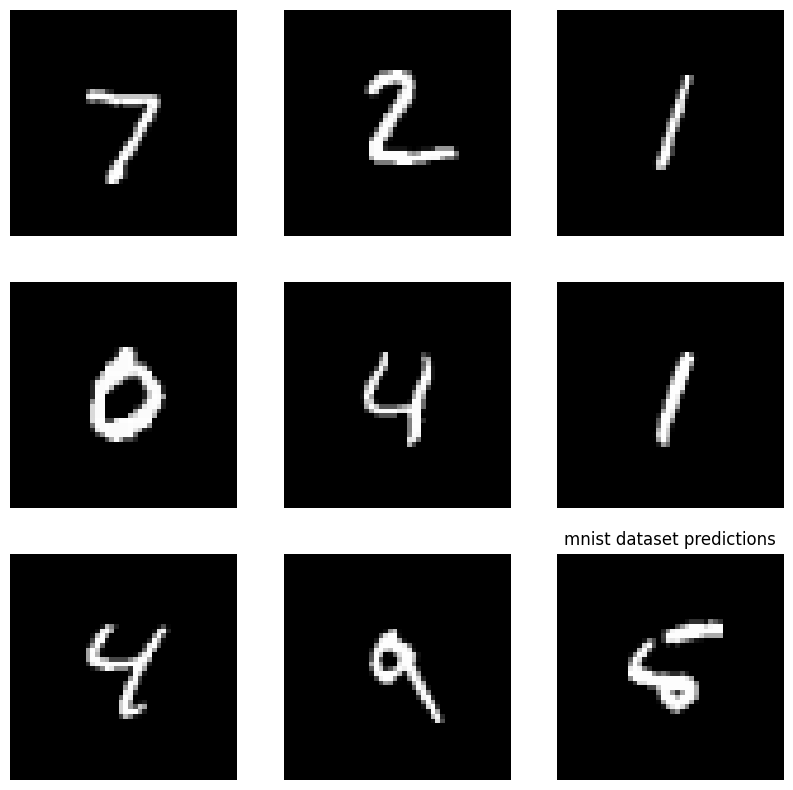

In [ ]:
plt.figure(figsize=(10,10))
for ind in range(9):
  plt.subplot(3,3,ind+1)
  plt.imshow(x_test[ind])
  plt.xlabel(f"Truth: {truth[ind]}, Predicted: {pred[ind]}",fontsize=10)
  plt.axis('off')

plt.title("mnist dataset predictions")
plt.show()